# Table of Content

- [1.0 Splitting](#1.0)

- [2.0 SGDClassifier (sgdc)](#2.0)

  - [2.1 Build sgdc Model](#2.1)
  - [2.2 Evaluate sgdc Model](#2.2)

- [3.0 SVMClassifier (svc))](#3.0)

  - [3.1 Build svc Model](3.1)
  - [3.2 Evaluate svc Model](#3.2)

- [4.0 Decision-Trees (DTsC)](#4.0)

  - [4.1 Build DTsC Model](#4.1)
  - [4.2 Evaluate DTsC Model](#4.2)

- [5.0 RandomForestClassifier (RFC)](#5.0)

  - [5.1 Build RFC Model](#5.1)
  - [5.2 Evaluate RFC Model](#5.2)

- [6.0 K-nearest neighbors (KNN)](#6.0)

  - [6.1 Build KNN Model](#6.1)
  - [6.2 Evaluate KNN Model](#6.2)

- [7.0 VottingSystemClassifier (VSC)](#7.0)


In [9]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingRegressor,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

# model pipelining
from sklearn.pipeline import Pipeline

# Selection

pd.options.display.max_columns = None

In [3]:
heart_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Heart-Disease-Prediction/Prepered data sets/final_dataset.csv"
)

heart_df

,Unnamed: 0,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate,Sex_Male,Chest_pain_Atypical angina,Chest_pain_Non-anginal pain,Chest_pain_Typical angina,Fasting_blood_sugar_True,electrocardiographic_Hypertrophy,electrocardiographic_Normal,Exercise_induced_angina_Yes,Slope_of_peak_exercise_Flat,Slope_of_peak_exercise_Upsloping,stress_test_Normal,stress_test_Not described,stress_test_Reversible defect
0,0,63,145,233,150,2.3,0,1,3,0,3,3,3,1,0,0,0,1,0,1,0,0,1,0,0,0
1,1,37,130,250,187,3.5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,2,41,130,204,172,1.4,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,3,56,120,236,178,0.8,0,1,3,0,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,1
4,4,57,120,354,163,0.6,0,1,3,0,2,2,2,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,298,57,140,241,123,0.2,0,0,3,0,2,2,2,0,0,0,1,0,0,0,1,1,0,0,1,0
259,299,45,110,264,132,1.2,0,0,2,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
260,300,68,144,193,141,3.4,2,0,4,0,3,3,3,1,0,0,1,1,0,0,0,1,0,0,1,0
261,301,57,130,131,115,1.2,1,0,3,0,2,2,2,1,0,0,1,0,0,0,1,1,0,0,1,0


# [1.0 Splitting](#1.0)


In [6]:
features = heart_df.drop(columns=["Heart_disease"], axis=1)
test = heart_df["Heart_disease"]
x_train, x_test, y_train, y_test = train_test_split(
    features, test, test_size=0.35, random_state=42
)
x_train.shape, x_test.shape

((170, 25), (93, 25))

# [2.0 SGDClassifier (sgdc)](#2.0)


### [2.1 Build sgdc Model](#2.1)


In [34]:
def build_SGD(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    train_score, test_score, used_alphas = [], [], []

    alpha = [
        0.00001,
        0.000001,
        0.0000001,
        0.00002,
        0.000002,
        0.0000002,
        0.00003,
        0.000003,
        0.00004,
        0.000004,
        0.0000004,
        0.00005,
        0.000005,
        0.0000005,
    ]

    for alp in alpha:

        scaler = StandardScaler()
        SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=alp)

        pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

        pip.fit(x_train, y_train)

        train_acc = pip.score(x_train, y_train)
        test_acc = pip.score(x_test, y_test)
        train_score.append(train_acc)
        test_score.append(test_acc)
        used_alphas.append(alp)

    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SGD()

### [2.2 Evaluate sgdc Model](#2.2)


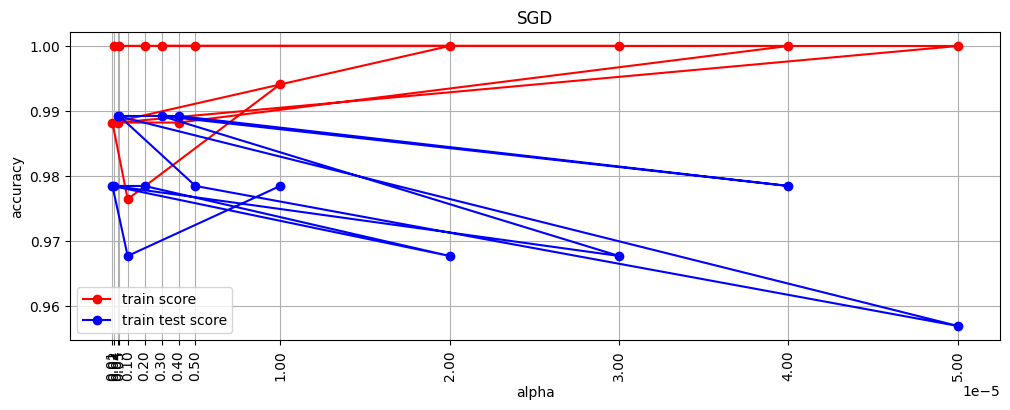

In [51]:
def evaluate_SGD(
    train_score=train_score, test_score=test_score, used_alphas=used_alphas
):
    plt.figure(figsize=(12, 4))

    plt.plot(used_alphas, train_score, color="red", marker="o", label="train score")
    plt.plot(
        used_alphas, test_score, color="blue", marker="o", label="train test score"
    )

    plt.xlabel("alpha")
    plt.ylabel("accuracy")
    plt.title("SGD")
    plt.grid(True)
    plt.xticks(used_alphas, rotation=90)
    plt.legend()
    plt.show()
    return


evaluate_SGD()

In [43]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.000003)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(1.0, 0.978494623655914)

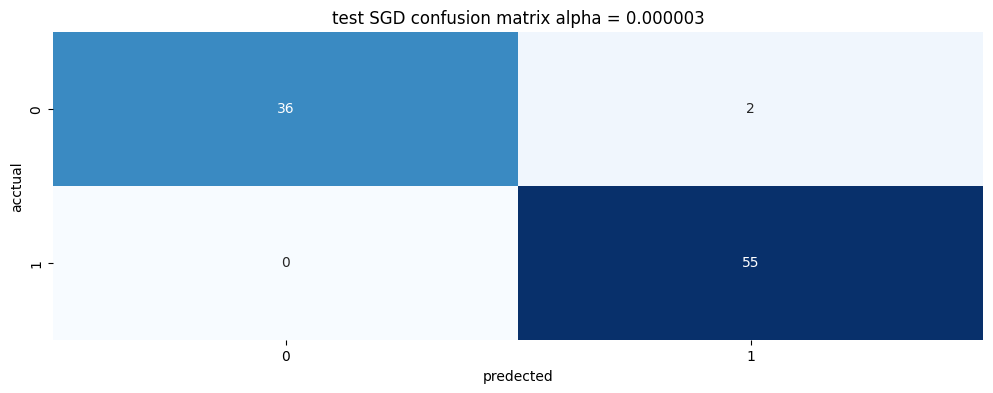

In [57]:
y_pred = pip.predict(x_test)

cm_SGD = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("test SGD confusion matrix alpha = 0.000003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

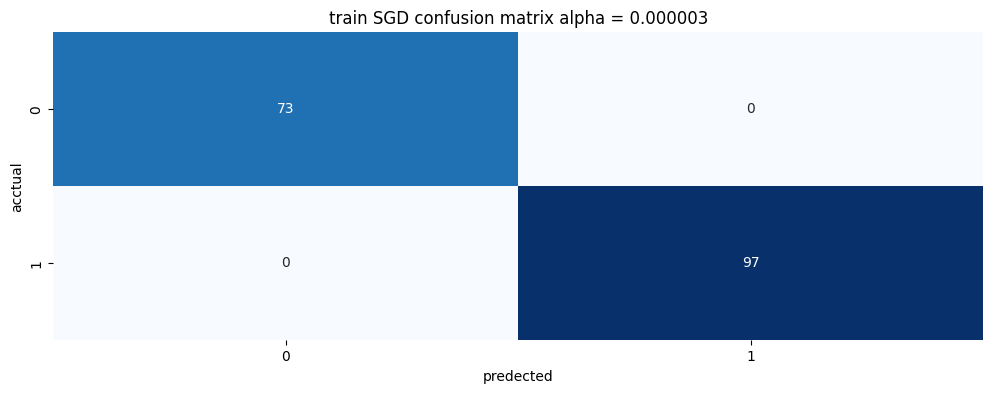

In [58]:
y_pred = pip.predict(x_train)

cm_SGD = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("train SGD confusion matrix alpha = 0.000003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [59]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        97

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.96      1.00      0.98        55

    accuracy                           0.98        93
   macro avg       0.98      0.97      0.98        93
weighted avg       0.98      0.98      0.98        93



# [3.0 SVMClassifier (svc))](#3.0)


### [3.1 Build svc Model](3.1)


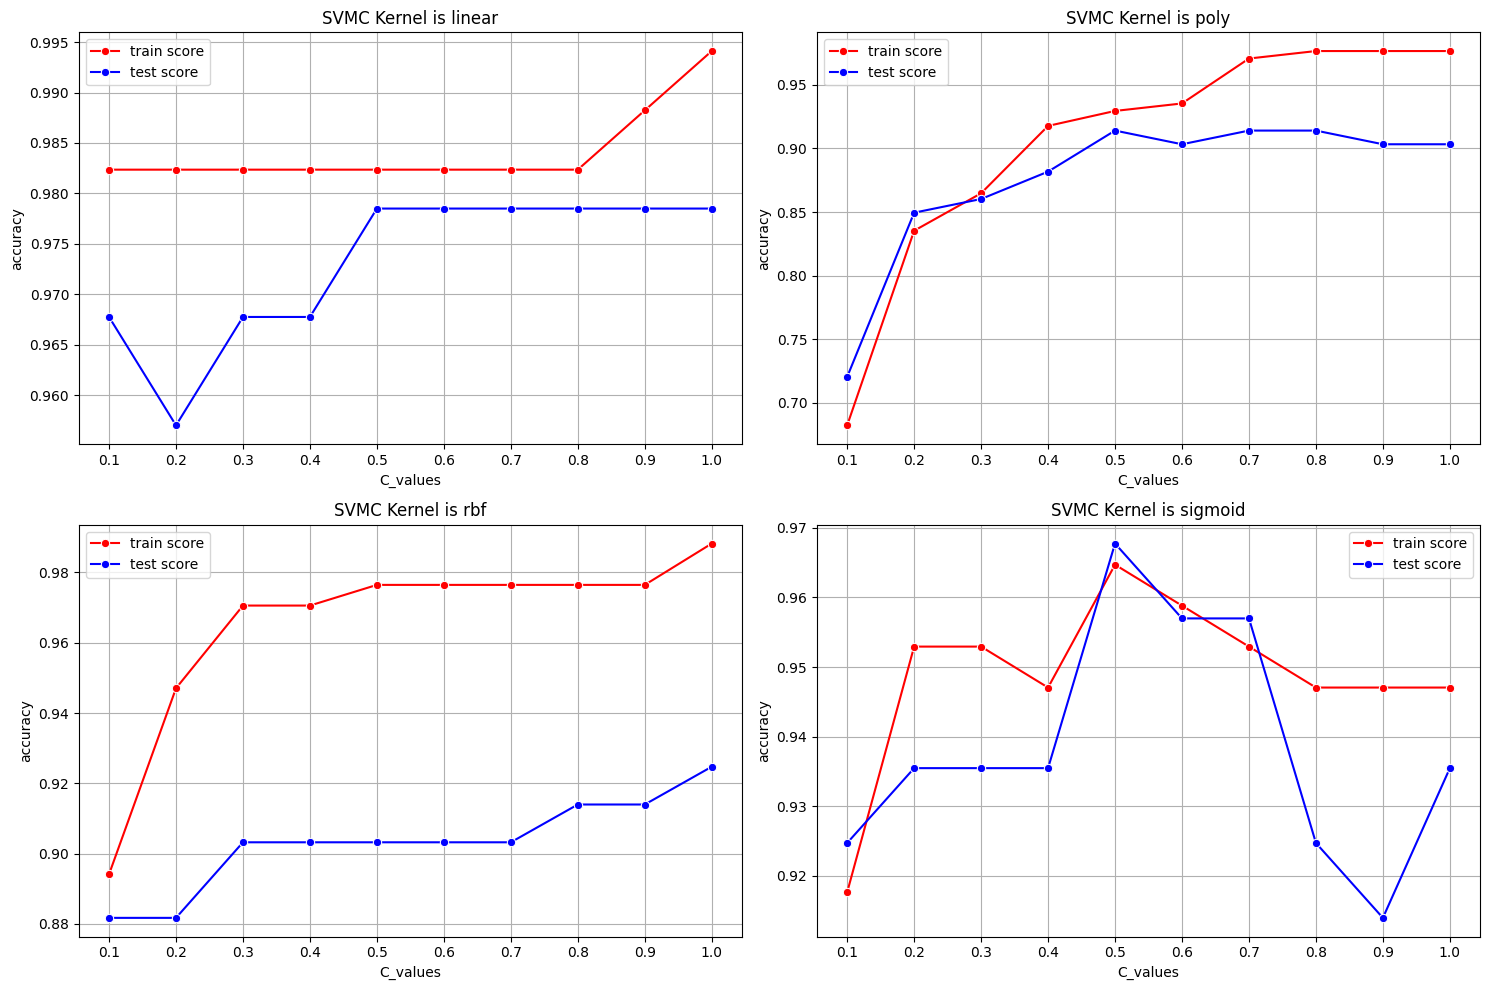

In [76]:
def build_SVM(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):

    C_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    kernels = ["linear", "poly", "rbf", "sigmoid"]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, ker in enumerate(kernels):
        train_score, test_score = [], []
        for c in C_values:

            deg = 1
            if ker == "poly":
                deg = 3
            scaler = StandardScaler()
            svc = SVC(kernel=ker, C=c, degree=deg)

            pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

            pip.fit(x_train, y_train)

            train_acc = pip.score(x_train, y_train)
            test_acc = pip.score(x_test, y_test)
            train_score.append(train_acc)
            test_score.append(test_acc)

        row = i // 2
        col = i % 2

        ax = axes[row, col]

        sns.lineplot(
            x=C_values,
            y=train_score,
            color="red",
            marker="o",
            label="train score",
            ax=ax,
        )
        sns.lineplot(
            x=C_values,
            y=test_score,
            color="blue",
            marker="o",
            label="test score",
            ax=ax,
        )

        ax.set_xlabel("C_values")
        ax.set_ylabel("accuracy")
        ax.set_title("SVMC Kernel is " + ker)
        ax.set_xticks(C_values)
        ax.grid(True)

    plt.tight_layout()
    plt.legend()
    plt.show()
    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SVM()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> best kernel is sigmoid</b><br>
    </span>    
</div>


In [80]:
scaler = StandardScaler()
svc = SVC(kernel="linear", C=1, degree=1)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.9941176470588236, 0.978494623655914)

### [3.2 Evaluate svc Model](#3.2)


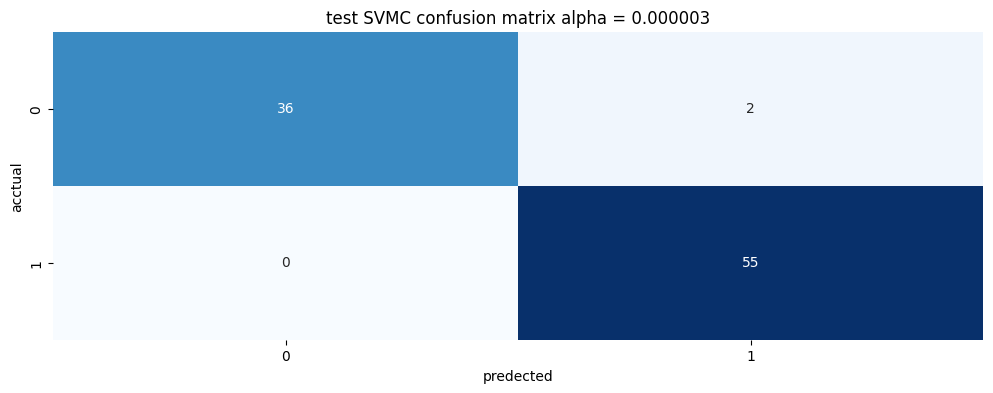

In [81]:
y_pred = pip.predict(x_test)

cm_SGD = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("test SVMC confusion matrix alpha = 0.000003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

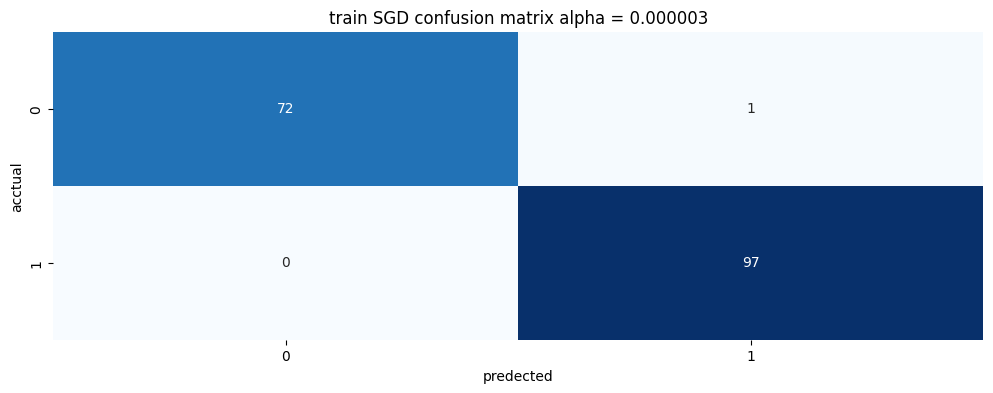

In [82]:
y_pred = pip.predict(x_train)

cm_SGD = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("train SGD confusion matrix alpha = 0.000003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [83]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.99      1.00      0.99        97

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.96      1.00      0.98        55

    accuracy                           0.98        93
   macro avg       0.98      0.97      0.98        93
weighted avg       0.98      0.98      0.98        93

